FORECASTING INTEREST RATE HIKES BY THE U.S. FEDERAL RESERVE

The federal funds rate is the key interest rate that the U.S. Federal Reserve uses to influence economic growth. The Federal Open Market Committee meets regularly to decide whether to increase, decrease, or maintain the target interest rate. Their choice has important ramifications that cascade through the economy, so the announcement of the interest rates is eagerly awaited each month.

In this problem, we will use analytics to try to predict when the Federal Reserve will raise interest rates. We will look at monthly economic and political data dating back to the mid-1960's. In this analysis, the dependent variable will be the binary outcome variable **RaisedFedFunds**, which takes value 1 if the federal funds rate was increased that month and 0 if it was lowered or stayed the same. For each month, the file [federalFundsRate.csv](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/b98535759d2f4cb614dd7cc9141bde6f/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/federalFundsRate.csv) contains the following independent variables:

* Date: The date the change was announced.
* Chairman: The name of the Federal Reserve Chairman at the time the change was announced.
* PreviousRate: The federal funds rate in the prior month.
* Streak: The current streak of raising or not raising the rate, e.g. +8 indicates the rate has been increased 8 months in a row, whereas -3 indicates the rate has been lowered or stayed the same for 3 months in a row.
* GDP: The U.S. Gross Domestic Product, in Billions of Chained 2009 US Dollars.
* Unemployment: The unemployment rate in the U.S.
* CPI: The Consumer Price Index, an indicator of inflation, in the U.S.
* HomeownershipRate: The rate of homeownership in the U.S.
* DebtAsPctGDP: The U.S. national debt as a percentage of GDP
* DemocraticPres: Whether the sitting U.S. President is a Democrat (DemocraticPres=1) or a Republican (DemocraticPres=0)
* MonthsUntilElection: The number of remaining months until the next U.S. presidential election.

In [2]:
fedFunds = read.csv('data/federalFundsRate.csv', stringsAsFactors=FALSE)

In [3]:
str(fedFunds)

'data.frame':	585 obs. of  12 variables:
 $ Date               : chr  "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" ...
 $ Chairman           : chr  "Martin, William M." "Martin, William M." "Martin, William M." "Martin, William M." ...
 $ PreviousRate       : num  4.42 4.6 4.65 4.67 4.9 5.17 5.3 5.53 5.4 5.53 ...
 $ Streak             : int  4 5 6 7 8 9 10 11 -1 1 ...
 $ GDP                : num  4202 4202 4202 4219 4219 ...
 $ Unemployment       : num  4 3.8 3.8 3.8 3.9 3.8 3.8 3.8 3.7 3.7 ...
 $ CPI                : num  31.9 32.1 32.2 32.3 32.4 ...
 $ HomeownershipRate  : num  63.5 63.5 63.5 63.2 63.2 63.2 63.3 63.3 63.3 63.8 ...
 $ DebtAsPctGDP       : num  40.3 4201.9 4201.9 39.2 4219.1 ...
 $ DemocraticPres     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MonthsUntilElection: int  33 32 31 30 29 28 27 26 25 24 ...
 $ RaisedFedFunds     : int  1 1 1 1 1 1 1 0 1 1 ...


In [15]:
sum(fedFunds$RaisedFedFunds[fedFunds$RaisedFedFunds == 1]) / nrow(fedFunds)

[1] 0.5025641

In [20]:
table(fedFunds$Chairman)


     Bernanke, Ben      Burns, Arthur    Greenspan, Alan Martin, William M. 
                96                 96                221                 48 
Miller, G. William                N/A      Volcker, Paul      Yellen, Janet 
                17                  2                 96                  9 

In [27]:
fedFunds$Chairman = as.factor(fedFunds$Chairman)
fedFunds$DemocraticPres = as.factor(fedFunds$DemocraticPres)
fedFunds$RaisedFedFunds = as.factor(fedFunds$RaisedFedFunds)

In [28]:
str(fedFunds)

'data.frame':	585 obs. of  12 variables:
 $ Date               : chr  "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" ...
 $ Chairman           : Factor w/ 8 levels "Bernanke, Ben",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ PreviousRate       : num  4.42 4.6 4.65 4.67 4.9 5.17 5.3 5.53 5.4 5.53 ...
 $ Streak             : int  4 5 6 7 8 9 10 11 -1 1 ...
 $ GDP                : num  4202 4202 4202 4219 4219 ...
 $ Unemployment       : num  4 3.8 3.8 3.8 3.9 3.8 3.8 3.8 3.7 3.7 ...
 $ CPI                : num  31.9 32.1 32.2 32.3 32.4 ...
 $ HomeownershipRate  : num  63.5 63.5 63.5 63.2 63.2 63.2 63.3 63.3 63.3 63.8 ...
 $ DebtAsPctGDP       : num  40.3 4201.9 4201.9 39.2 4219.1 ...
 $ DemocraticPres     : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ MonthsUntilElection: int  33 32 31 30 29 28 27 26 25 24 ...
 $ RaisedFedFunds     : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...


In [29]:
set.seed(201)

library(caTools)

spl = sample.split(fedFunds$RaisedFedFunds, 0.7)

In [31]:
training = subset(fedFunds, spl == TRUE)
testing = subset(fedFunds, spl == FALSE)

## Training model:

In [32]:
model_log = glm(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + HomeownershipRate + DemocraticPres + MonthsUntilElection,
                    data = training, family = binomial)

In [33]:
summary(model_log)


Call:
glm(formula = RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
    HomeownershipRate + DemocraticPres + MonthsUntilElection, 
    family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8177  -1.0121   0.2301   1.0491   2.5297  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          9.121012   5.155774   1.769   0.0769 .  
PreviousRate        -0.003427   0.032350  -0.106   0.9156    
Streak               0.157658   0.025147   6.270 3.62e-10 ***
Unemployment        -0.047449   0.065438  -0.725   0.4684    
HomeownershipRate   -0.136451   0.076872  -1.775   0.0759 .  
DemocraticPres1      0.347829   0.233200   1.492   0.1358    
MonthsUntilElection -0.006931   0.007678  -0.903   0.3666    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 568.37  on 409  degrees of freedom
Residual devia

In [52]:
predict(model_log, type='response', data.frame(
    PreviousRate = 1.7, 
    Streak = -3, 
    Unemployment = 5.1, 
    HomeownershipRate = 65.3,
    DemocraticPres = factor(0, levels = c(0,1)),
    MonthsUntilElection = 18))

1 
0.3464297

In [49]:
factor(2, levels = c(0,1))

[1] <NA>
Levels: 0 1

In [53]:
x = data.frame(
    PreviousRate = 1.7, 
    Streak = -3, 
    Unemployment = 5.1, 
    HomeownershipRate = 65.3,
    DemocraticPres = factor(0, levels = c(0,1)),
    MonthsUntilElection = 18)

In [51]:
str(x)

'data.frame':	1 obs. of  6 variables:
 $ PreviousRate       : num 1.7
 $ Streak             : num -3
 $ Unemployment       : num 5.1
 $ HomeownershipRate  : num 65.3
 $ DemocraticPres     : Factor w/ 2 levels "0","1": 2
 $ MonthsUntilElection: num 18


## Test :

In [54]:
test_pred = predict(model_log, type='response', newdata = testing)

In [55]:
table(testing$RaisedFedFunds, test_pred > 0.5)

   
    FALSE TRUE
  0    60   27
  1    31   57

In [57]:
library(ROCR)
ROCRpred = prediction(test_pred, testing$RaisedFedFunds)
as.numeric(performance(ROCRpred, "auc")@y.values)

Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.704023

In [58]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")

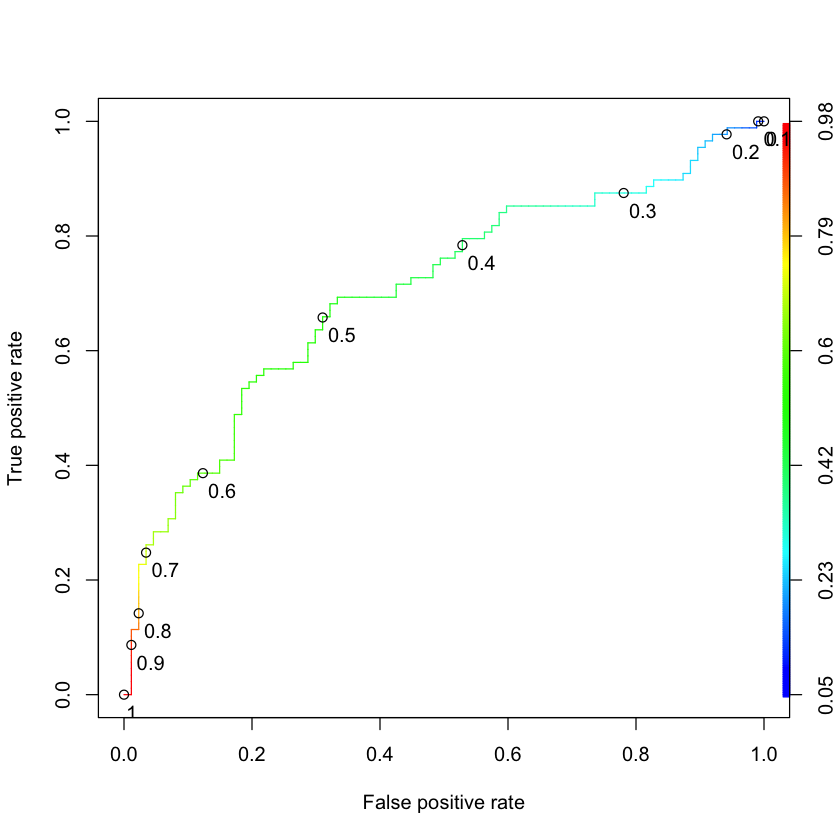

In [59]:
plot(ROCRperf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,1.7))

# Cross validation:

In [60]:
library(caret)
library(e1071)

Warning message:
: package ‘caret’ was built under R version 3.2.4Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [63]:
set.seed(201)
numFolds = trainControl(method='cv', number=10)
cpGrid = expand.grid(.cp=seq(0.001, 0.05, 0.001))

In [64]:
train(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
          HomeownershipRate + DemocraticPres + MonthsUntilElection,
     data=training,
     method='rpart',
     trControl=numFolds,
     tuneGrid=cpGrid)

CART 

410 samples
 11 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 368, 368, 368, 370, 369, 369, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.001  0.6221312  0.2448321
  0.002  0.6221312  0.2448321
  0.003  0.6365331  0.2734338
  0.004  0.6340331  0.2684338
  0.005  0.6340331  0.2684338
  0.006  0.6487921  0.2980610
  0.007  0.6487921  0.2980610
  0.008  0.6487921  0.2980610
  0.009  0.6537311  0.3080170
  0.010  0.6537311  0.3080170
  0.011  0.6583101  0.3173385
  0.012  0.6583101  0.3173385
  0.013  0.6583101  0.3173385
  0.014  0.6632491  0.3272594
  0.015  0.6632491  0.3272594
  0.016  0.6632491  0.3272594
  0.017  0.6609901  0.3231241
  0.018  0.6609901  0.3231241
  0.019  0.6609901  0.3231241
  0.020  0.6560511  0.3137948
  0.021  0.6512892  0.3042710
  0.022  0.6437892  0.2892710
  0.023  0.6437892  0.2892710
  0.024  0.6583130  0.3183186
  0.025  0.6583130  0.3183186


In [65]:
model_cart = rpart(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
          HomeownershipRate + DemocraticPres + MonthsUntilElection,
                    data=training,
                    method='class',
                     cp = 0.016)

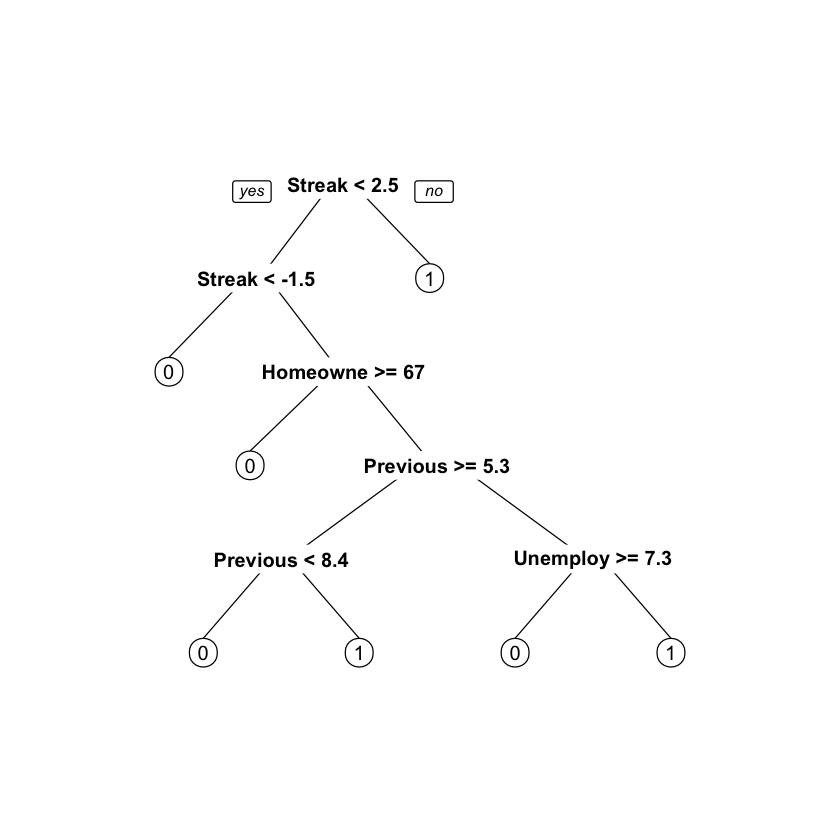

In [68]:
library(rpart)
library(rpart.plot)
prp(model_cart)

In [69]:
PredictCART = predict(model_cart, newdata = testing, type='class')

In [70]:
table(testing$RaisedFedFunds, PredictCART)

   PredictCART
     0  1
  0 64 23
  1 40 48

In [71]:
t = table(testing$RaisedFedFunds, PredictCART)
sum(diag(t)) / sum(t)

[1] 0.64

[1] 175